<a href="https://colab.research.google.com/github/Trev621/GenAI/blob/main/HW2/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Trevor Lacoste
The purpose of this assignment is to compare the performance of a simple Multi-Layer Perceptron (MLP) and a Convolutional Neural Network (CNN) using strides on the CIFAR-10 dataset.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

In [49]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [50]:
#Normalize the images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [51]:
#Function to create MLP model
def create_mlp_model(input_shape):
  model = models.Sequential() #Sequential model

  model.add(layers.Input(shape=input_shape)) #Input layer

  model.add(layers.Flatten()) #Flatten layer
  model.add(layers.Dense(500, activation = 'relu')) #Dense layer
  model.add(layers.Dropout(.5)) #Dropout layer
  model.add(layers.Dense(250, activation = 'relu')) #Another dense layer

  model.add(layers.Dense(10, activation = 'softmax')) #Output layer

  #Compile model
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

#Creating the MLP model
input = (32, 32, 3)
mlpModel = create_mlp_model(input)
mlpModel.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 500)                 │       1,536,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,664,260 (6.35 MB)

 Trainable params: 1,664,260 (6.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the MLP model
results = mlpModel.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=.2, shuffle=True)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.1786 - loss: 2.2260 - val_accuracy: 0.2537 - val_loss: 2.0108
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.2213 - loss: 2.0519 - val_accuracy: 0.2931 - val_loss: 1.9956
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.2339 - loss: 2.0227 - val_accuracy: 0.2835 - val_loss: 1.9770
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 25ms/step - accuracy: 0.2472 - loss: 2.0019 - val_accuracy: 0.3123 - val_loss: 1.9647
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.2515 - loss: 1.9885 - val_accuracy: 0.3144 - val_loss: 1.9563
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.2604 - loss: 1.9815 - val_accuracy: 0.2740 - val_loss: 2.0073
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.2664 - loss: 1.9660 - val_accuracy: 0.3021 - val_loss: 1.9276
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.2589 -

In [52]:
#Function to create CNN model
def create_cnn_model(input_shape):
  model = models.Sequential() #Sequential Model

  #First convolutional layer
  model.add(layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', input_shape = input_shape))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  #Second convolutional layer
  model.add(layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  #Third convolutional layer
  model.add(layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Flatten()) #Flatten layer
  model.add(layers.Dense(300, activation = 'relu')) #Dense layer
  model.add(layers.Dropout(.5)) #Dropout layer

  model.add(layers.Dense(10, activation = 'softmax')) #Output layer

  #Compile model
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

#Creating the CNN Model
input = (32, 32, 3)
cnnModel = create_cnn_model(input)
cnnModel.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_24 (ReLU)                      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_25 (ReLU)                      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_26 (ReLU)                      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 300)                 │       1,229,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,261,262 (4.81 MB)

 Trainable params: 1,261,006 (4.81 MB)

 Non-trainable params: 256 (1.00 KB)

In [53]:
#Training the CNN model
cnnResult = cnnModel.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, shuffle=True)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 107s 83ms/step - accuracy: 0.3163 - loss: 1.9020 - val_accuracy: 0.4614 - val_loss: 1.4415
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 78ms/step - accuracy: 0.4844 - loss: 1.4233 - val_accuracy: 0.4696 - val_loss: 1.5301
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.5566 - loss: 1.2281 - val_accuracy: 0.5867 - val_loss: 1.1471
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.6021 - loss: 1.1136 - val_accuracy: 0.5973 - val_loss: 1.1341
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.6348 - loss: 1.0198 - val_accuracy: 0.6198 - val_loss: 1.0566
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 79ms/step - accuracy: 0.6626 - loss: 0.9490 - val_accuracy: 0.6719 - val_loss: 0.9427
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.6821 - loss: 0.8891 - val_accuracy: 0.6866 - val_loss: 0.9148
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 79ms/step - accuracy: 0

In [54]:
#MLP Evaluation
mlpModel.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1083 - loss: 2.3470


[2.3520748615264893, 0.09969999641180038]

In [55]:
#CNN Evaluation
cnnModel.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6892 - loss: 0.9208


[0.9319180846214294, 0.689300000667572]

MLP Model: 


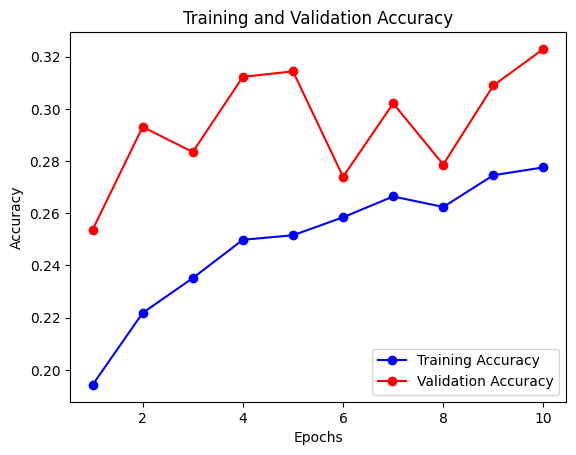

CNN Model: 


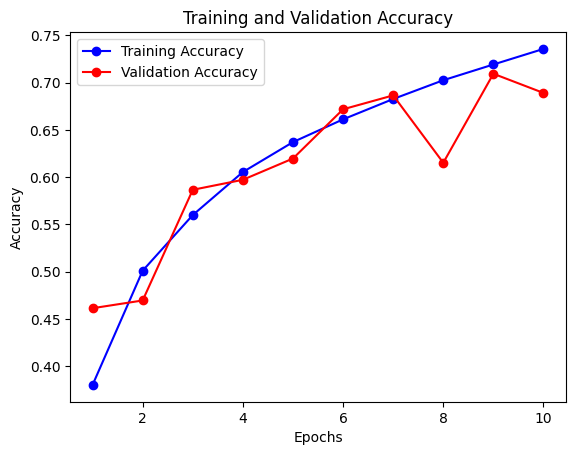

In [56]:
#Function to plot validation and training accuracies
def plotAccuracies(results):
    #Get training/validation accuracies from results
    trainAcc = results.history['accuracy']
    valAcc = results.history['val_accuracy']

    #Num epochs
    epochs = range(1, len(trainAcc) + 1)

    #Plotting training/validation accuracy
    plt.plot(epochs, trainAcc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, valAcc, 'ro-', label='Validation Accuracy')

    #Labels
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    #Show plot
    plt.show()

#Plotting MLP Model
print("MLP Model: ")
plotAccuracies(results)

#Plotting CNN model
print("CNN Model: ")
plotAccuracies(cnnResult)